# Deutsch's Algorithm with Random Function

***

In [1]:
# Qiskit itself
import qiskit

# Aer simulator.
import qiskit.providers.aer as aer

# Diagrams.
import matplotlib.pyplot as plt

# Random numbers.
import random

# Change pyplot style.
plt.style.use('ggplot')

In [2]:
# Return a random (part of) circuit - implementing the quantum oracle for f.
def random_f():
    # Create a circuit with 2 qubits, 1 classical bit.
    circuit = qiskit.QuantumCircuit(2, 1)
    
    # Pick one of the four functions at random.
    f_number = random.randint(1, 4)
    
    # 1: Constant 0 function. f(0) = f(1) = 0.
    # 2: Constant 1 function. f(0) = f(1) = 1.
    # 3: Balanced identity function. f(0) = 0, f(1) = 1.
    # 4: Balanced not function. f(0) = 1, f(1) = 0.
    
    if f_number == 1:
        # Apply Identity gate to second qubit.
        circuit.i(1)
    elif f_number == 2:
        # Apply Pauli x gate to second qubit.
        circuit.x(1)
    elif f_number == 3:
        # Apply CNOT gate to from first to second qubit.
        circuit.cnot(0, 1)
    elif f_number == 4:
        # Apply CNOT gate to from first to second qubit.
        circuit.cnot(0, 1)
        # Apply Pauli x gate to second qubit.
        circuit.x(1)
    else:
        print("Error!")
        
    # Return the circuit.
    return circuit

<br>

### Create First Part of Circuit

***

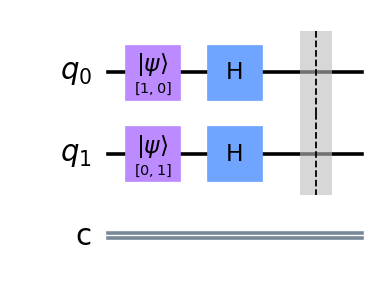

In [3]:
# Create a quantum circuit.
circuit = qiskit.QuantumCircuit(2, 1)

# Initialise the first qubit to |0>.
circuit.initialize([1, 0], 0)

# Initialise the second qubit to |1>.
circuit.initialize([0, 1], 1)

# Apply a Hadamard gate to each qubit.
circuit.h((0, 1))

# Separate parts of circuit.
circuit.barrier()

# Draw the circuit.
circuit.draw(output='mpl', scale=1.8)

<br>

### Create Second Part of Circuit

***

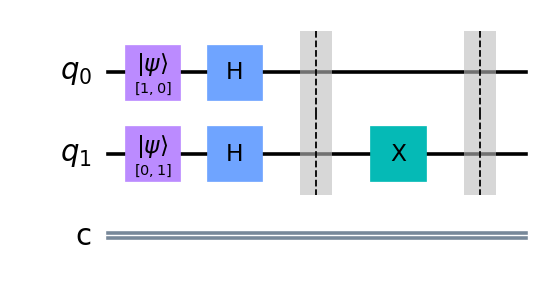

In [4]:
# Append the random_f() circuit to circuit.
circuit.compose(random_f(), inplace=True)

# Separate parts of circuit.
circuit.barrier()

# Draw the circuit.
circuit.draw(output='mpl', scale=1.8)

<br>

### Create Third Part of Circuit

***

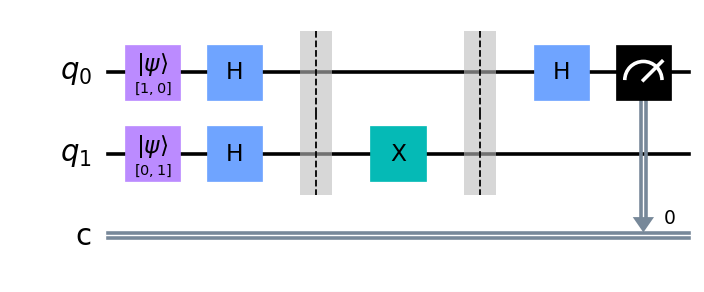

In [5]:
# Apply another Hadamard gate to the first qubit.
circuit.h(0)

# Measure the first qubit.
circuit.measure(0, 0)

# Draw the circuit.
circuit.draw(output='mpl', scale=1.8)

<br>

## Simulate and Decide

***

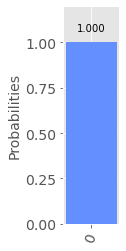

In [6]:
# Create a simulation instance.
simulator = aer.QasmSimulator()

# Compile the circuit in the simluator.
compcircuit = qiskit.transpile(circuit, simulator)

# Simulate the circuit 1000 times.
job = simulator.run(compcircuit, shots=1000)

# Get the results.
results = job.result()

# Show the result counts.
counts = results.get_counts()

# Display histogram
qiskit.visualization.plot_histogram(counts, figsize=(1, 4))

***

## End